In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
from datasets import load_dataset
import ast 
import seaborn as sns 

dataset =load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [3]:
df_US = df[df['job_country'] == 'United States'].copy()

In [4]:
df_US_expl = df_US.explode('job_skills')
df_US_expl = df_US_expl.groupby(['job_skills','job_title_short']).size().reset_index(name='skill_count')
df_US_expl


,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,38
1,airflow,Cloud Engineer,27
2,airflow,Data Analyst,387
3,airflow,Data Engineer,4716
4,airflow,Data Scientist,1166
...,...,...,...
1865,zoom,Machine Learning Engineer,5
1866,zoom,Senior Data Analyst,50
1867,zoom,Senior Data Engineer,30
1868,zoom,Senior Data Scientist,25


In [5]:
df_US_GS = df_US_expl.sort_values(by= 'skill_count', ascending=False)

In [6]:
df_US_GS

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [7]:
job_titles = df_US_GS['job_title_short'].unique().tolist()[0:3]


In [8]:
job_titles.append('Business Analyst')
job_titles.sort()


In [9]:
job_titles

['Business Analyst', 'Data Analyst', 'Data Engineer', 'Data Scientist']

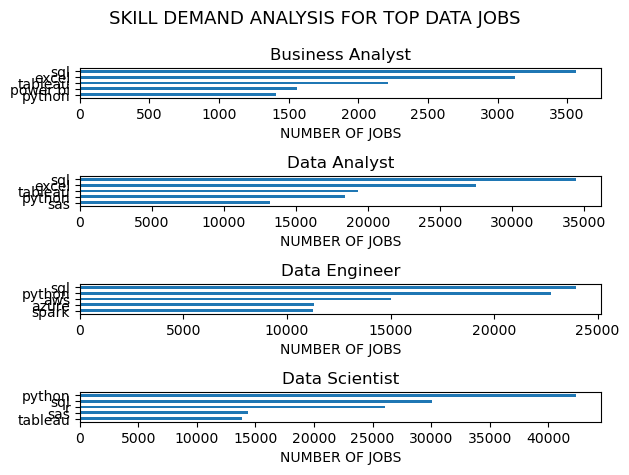

In [10]:
fig,ax=plt.subplots(len(job_titles),1)

for i,job_title in enumerate(job_titles):
    df_plot = df_US_GS[df_US_GS['job_title_short']== job_title].head(5)
    #sns.barplot(data=df_plot,x='skill_count', y='job_skills', ax=ax[i], hue='skill_count',palette='dark:b_r',legend=False)
    df_plot.plot(kind= 'barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title,legend=False)
    ax[i].set_ylabel('')
    ax[i].invert_yaxis()
    ax[i].set_xlabel('NUMBER OF JOBS')
    

fig.suptitle('SKILL DEMAND ANALYSIS FOR TOP DATA JOBS', fontsize=13)
fig.tight_layout()


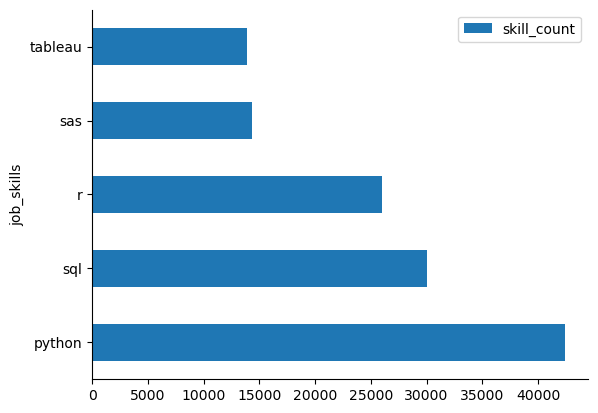

In [11]:
df_plot.plot(kind='barh',x='job_skills', y='skill_count')
sns.despine()

In [12]:
df_jts = df_US['job_title_short'].value_counts().reset_index(name='Total_Count')
df_jts

,job_title_short,Total_Count
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [13]:
df_merged = pd.merge(df_US_GS,df_jts, how='left', on= 'job_title_short')

In [14]:
df_merged[0:1]

,job_skills,job_title_short,skill_count,Total_Count
0,python,Data Scientist,42379,58830


In [15]:
df_merged['skill_percent']= 100 * df_merged['skill_count']/df_merged['Total_Count']

In [17]:
df_merged[0:1]

,job_skills,job_title_short,skill_count,Total_Count,skill_percent
0,python,Data Scientist,42379,58830,72.036376


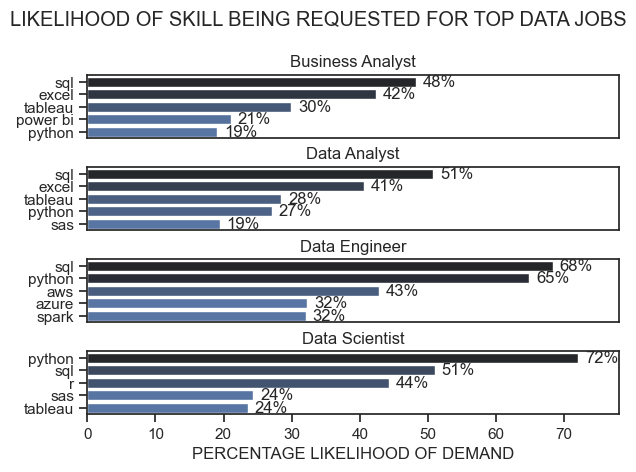

In [29]:
fig,ax=plt.subplots(len(job_titles),1)

sns.set_theme(style='ticks')
for i,job_title in enumerate(job_titles):
    df_plot = df_merged[df_merged['job_title_short']== job_title].head(5)
    sns.barplot(data=df_plot,x='skill_percent', y='job_skills', ax=ax[i], hue='skill_percent',palette='dark:b_r',legend=False)
    #df_plot.plot(kind= 'barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title,legend=False)
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,78)

    if i == len(job_titles) - 1:
       ax[i].set_xlabel('PERCENTAGE LIKELIHOOD OF DEMAND')
    else :
       ax[i].set_xlabel('')

    for n,v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1, n, f'{v:.0f}%', va='center')

    if i != len(job_titles)-1:
     ax[i].set_xticks([])

    
    

fig.suptitle('LIKELIHOOD OF SKILL BEING REQUESTED FOR TOP DATA JOBS')
fig.tight_layout(h_pad= 0.5)